# 1. INITIALIZATION


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 

# Data Loading


In [2]:
# Download AAPL data
print("Downloading AAPL data...")
data = yf.download("AAPL", start="2010-01-01", end="2024-10-28")
print(f"Downloaded {len(data)} rows of data")

[*********************100%%**********************]  1 of 1 completed

Downloaded 3729 rows of data


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800
...,...,...,...,...,...,...
2024-10-21,234.449997,236.850006,234.449997,236.479996,236.479996,36254500
2024-10-22,233.889999,236.220001,232.600006,235.860001,235.860001,38846600
2024-10-23,234.080002,235.139999,227.759995,230.759995,230.759995,52287000


In [4]:
# Check data types
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
data.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2024-10-14', '2024-10-15', '2024-10-16', '2024-10-17',
               '2024-10-18', '2024-10-21', '2024-10-22', '2024-10-23',
               '2024-10-24', '2024-10-25'],
              dtype='datetime64[ns]', name='Date', length=3729, freq=None)

In [6]:
if 'Date' in data.index:
  print("date is the index")
else:
  print("date is not the index")

date is not the index


In [7]:
data = data.reset_index()

In [8]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454505,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800
...,...,...,...,...,...,...,...
3724,2024-10-21,234.449997,236.850006,234.449997,236.479996,236.479996,36254500
3725,2024-10-22,233.889999,236.220001,232.600006,235.860001,235.860001,38846600
3726,2024-10-23,234.080002,235.139999,227.759995,230.759995,230.759995,52287000
3727,2024-10-24,229.979996,230.820007,228.410004,230.570007,230.570007,31109500


In [9]:
# Check data types
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

# EXPLORE DATASET


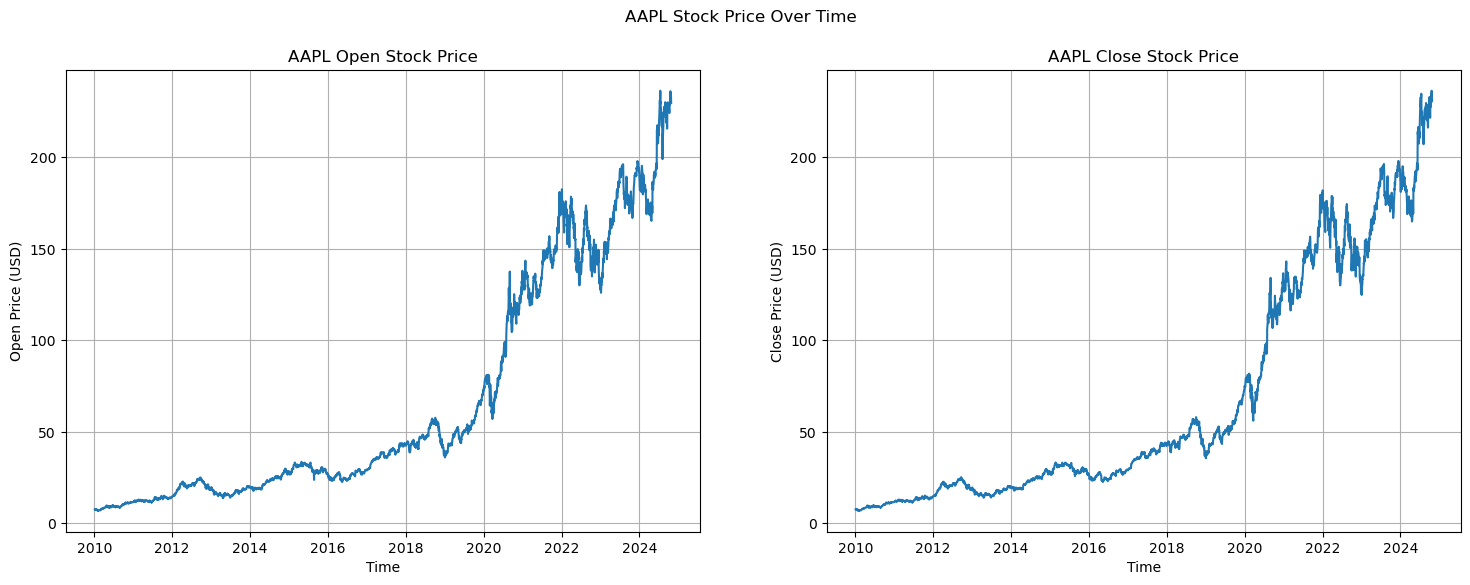

In [10]:
# Plot Open and Close price for the whole period
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(data["Date"], data["Open"])
plt.xlabel("Time")
plt.ylabel("Open Price (USD)")
plt.title("AAPL Open Stock Price")
plt.grid()

plt.subplot(1,2,2)
plt.plot(data["Date"], data["Close"])
plt.xlabel("Time")
plt.ylabel("Close Price (USD)")
plt.title("AAPL Close Stock Price")
plt.grid()

plt.suptitle("AAPL Stock Price Over Time")
plt.show()

In [11]:
# Select stock price records since 2010
data_2010 = data[data["Date"].dt.year >= 2010]

# Check filtered data shape
data_2010.shape

(3729, 7)

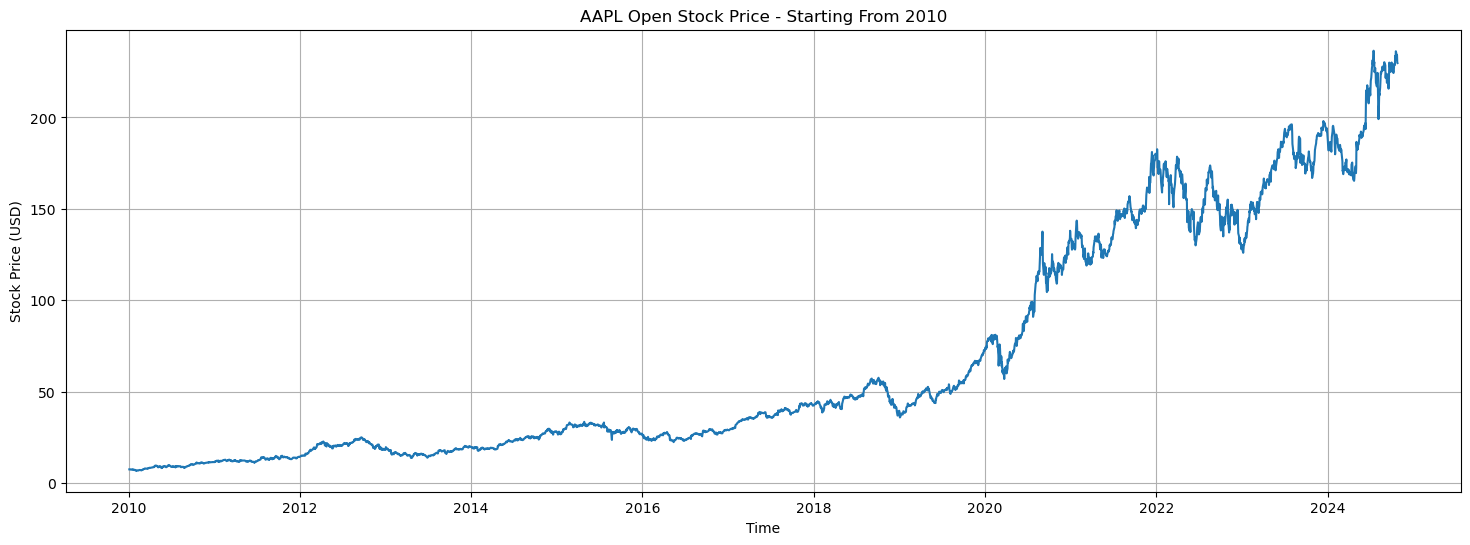

In [12]:
# Plot Open stock price performance since 2010
plt.figure(figsize=(18,6))
plt.plot(data_2010["Date"], data_2010["Open"])
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.title("AAPL Open Stock Price - Starting From 2010")
plt.grid()

# More libraries

In [13]:
# Import necessary libraries and modules
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import joblib
import matplotlib.dates as mdates
import numpy as np

In [14]:
# Set output width
pd.set_option("display.width", 120)

# Feature Engineering

In [15]:
# Feature engineering
print("\nPerforming feature engineering...")
data_2010['Returns'] = data_2010['Close'].pct_change()
data_2010['Log_Returns'] = np.log(data_2010['Close'] / data_2010['Close'].shift(1)) #used for long term average values of stocks
data_2010['MA_5'] = data_2010['Close'].rolling(window=5).mean()  #used for short term average values of stocks
data_2010['MA_20'] = data_2010['Close'].rolling(window=20).mean()
data_2010['Volatility'] = data_2010['Returns'].rolling(window=20).std() # measures standard deviation, how much swings there are in stock prices in a day
data_2010['Price_Momentum'] = data_2010['Close'] / data_2010['Close'].shift(5) - 1 #the rate of stock prices in a 5-day period

# Create lagged features
for i in range(1, 6):
    data_2010[f'Lag_{i}'] = data_2010['Close'].shift(i) 

data_2010 = data_2010.dropna()
print(f"After feature engineering, we have {len(data_2010)} rows")


Performing feature engineering...
After feature engineering, we have 3709 rows


In [16]:
data_2010

,Date,Open,High,Low,Close,Adj Close,Volume,Returns,Log_Returns,MA_5,MA_20,Volatility,Price_Momentum,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
20,2010-02-02,6.996786,7.011429,6.906429,6.995000,5.907104,698342400,0.005803,0.005786,7.070143,7.362804,0.022815,-0.048946,6.954643,6.859286,7.117500,7.424286,7.355000
21,2010-02-03,6.970357,7.150000,6.943571,7.115357,6.008743,615328000,0.017206,0.017060,7.008357,7.335750,0.023283,-0.041611,6.995000,6.954643,6.859286,7.117500,7.424286
22,2010-02-04,7.026071,7.084643,6.841786,6.858929,5.792197,757652000,-0.036039,-0.036704,6.956643,7.301964,0.024267,-0.036329,7.115357,6.995000,6.954643,6.859286,7.117500
23,2010-02-05,6.879643,7.000000,6.816071,6.980714,5.895041,850306800,0.017756,0.017600,6.980929,7.274964,0.024767,0.017703,6.858929,7.115357,6.995000,6.954643,6.859286
24,2010-02-08,6.988929,7.067143,6.928571,6.932857,5.854628,478270800,-0.006856,-0.006879,6.976571,7.243071,0.024661,-0.003133,6.980714,6.858929,7.115357,6.995000,6.954643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3724,2024-10-21,234.449997,236.850006,234.449997,236.479996,236.479996,36254500,0.006298,0.006278,233.851999,229.082999,0.013030,0.022395,235.000000,232.149994,231.779999,233.850006,231.300003
3725,2024-10-22,233.889999,236.220001,232.600006,235.860001,235.860001,38846600,-0.002622,-0.002625,234.253998,229.507500,0.013067,0.008595,236.479996,235.000000,232.149994,231.779999,233.850006
3726,2024-10-23,234.080002,235.139999,227.759995,230.759995,230.759995,52287000,-0.021623,-0.021860,234.049997,229.727000,0.014037,-0.004401,235.860001,236.479996,235.000000,232.149994,231.779999
3727,2024-10-24,229.979996,230.820007,228.410004,230.570007,230.570007,31109500,-0.000823,-0.000824,233.734000,229.879500,0.014010,-0.006806,230.759995,235.860001,236.479996,235.000000,232.149994


In [17]:
data_2010.dtypes

Date              datetime64[ns]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Adj Close                float64
Volume                     int64
Returns                  float64
Log_Returns              float64
MA_5                     float64
MA_20                    float64
Volatility               float64
Price_Momentum           float64
Lag_1                    float64
Lag_2                    float64
Lag_3                    float64
Lag_4                    float64
Lag_5                    float64
dtype: object

In [18]:
# Define selected features and target attribute
features = ["Open", "High", "Low","Close", "Adj Close", "Volume", 'Returns', 'Log_Returns', 'MA_5', 'MA_20', 'Volatility', 'Price_Momentum', 
            'Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']
target = "Open"

# Create Train, Validation, and Test Datasets


In [19]:
# Define start and end time for each period
train_end_date = pd.to_datetime("2022-12-31")
validate_start_date = pd.to_datetime("2023-01-01")
validate_end_date = pd.to_datetime("2023-12-31")
test_start_date = pd.to_datetime("2024-01-01")
test_end_date = pd.to_datetime("2024-10-27")

# Split dataset into training, validation, and testing
data_train = data_2010[data_2010["Date"] <= train_end_date][features]
data_train_dates = data_2010[data_2010["Date"] <= train_end_date]["Date"]
data_validate = data_2010[(data_2010["Date"] >= validate_start_date) & (data_2010["Date"] <= validate_end_date)][features]
data_validate_dates = data_2010[(data_2010["Date"] >= validate_start_date) & (data_2010["Date"] <= validate_end_date)]["Date"]
data_test = data_2010[(data_2010["Date"] >= test_start_date) & (data_2010["Date"] <= test_end_date)][features]
data_test_dates = data_2010[(data_2010["Date"] >= test_start_date) & (data_2010["Date"] <= test_end_date)]["Date"]

In [20]:
# Display the shape of each dataset
print(f"Training Set: {data_train.shape}")
print(f"Validation Set: {data_validate.shape}")
print(f"Testing Set: {data_test.shape}")

Training Set: (3252, 17)
Validation Set: (250, 17)
Testing Set: (207, 17)


In [21]:
# Display a summary of each dataset
print("Training Dataset:")
print(data_train.head())
print("Validation Dataset:")
print(data_validate.head())
print("Testing Dataset:")
print(data_test.head())

Training Dataset:
        Open      High       Low     Close  Adj Close     Volume   Returns  Log_Returns      MA_5     MA_20  \
20  6.996786  7.011429  6.906429  6.995000   5.907104  698342400  0.005803     0.005786  7.070143  7.362804   
21  6.970357  7.150000  6.943571  7.115357   6.008743  615328000  0.017206     0.017060  7.008357  7.335750   
22  7.026071  7.084643  6.841786  6.858929   5.792197  757652000 -0.036039    -0.036704  6.956643  7.301964   
23  6.879643  7.000000  6.816071  6.980714   5.895041  850306800  0.017756     0.017600  6.980929  7.274964   
24  6.988929  7.067143  6.928571  6.932857   5.854628  478270800 -0.006856    -0.006879  6.976571  7.243071   

    Volatility  Price_Momentum     Lag_1     Lag_2     Lag_3     Lag_4     Lag_5  
20    0.022815       -0.048946  6.954643  6.859286  7.117500  7.424286  7.355000  
21    0.023283       -0.041611  6.995000  6.954643  6.859286  7.117500  7.424286  
22    0.024267       -0.036329  7.115357  6.995000  6.954643  6.85

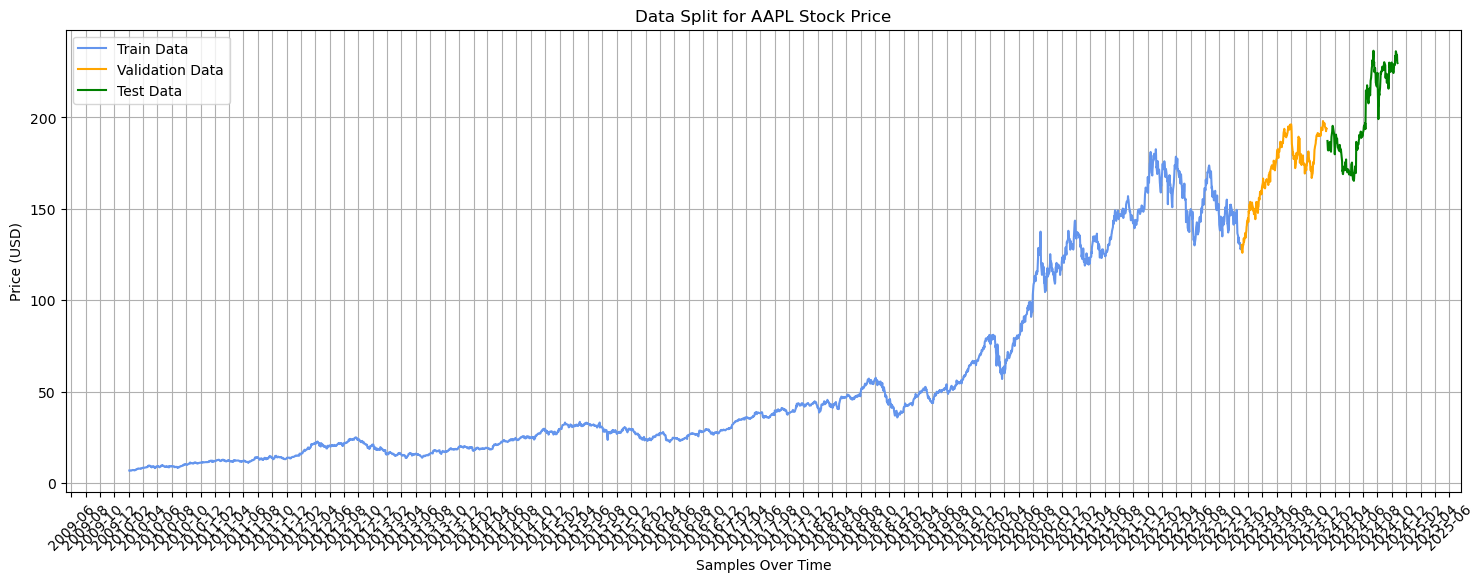

In [22]:
# Plot stock prices for each data split
plt.figure(figsize=(18,6))
plt.plot(data_train_dates, data_train["Open"], color="cornflowerblue")
plt.plot(data_validate_dates, data_validate["Open"], color="orange")
plt.plot(data_test_dates, data_test["Open"], color="green")
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for AAPL Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()

## Data Scaling


In [23]:
# Check the distribution of input features
data_2010[features].describe()

,Open,High,Low,Close,Adj Close,Volume,Returns,Log_Returns,MA_5,MA_20,Volatility,Price_Momentum,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
count,3709.000000,3709.000000,3709.000000,3709.000000,3709.000000,3.709000e+03,3709.000000,3709.000000,3709.000000,3709.000000,3709.000000,3709.000000,3709.000000,3709.000000,3709.000000,3709.000000,3709.000000
mean,68.006372,68.723753,67.320652,68.054215,65.931030,2.291040e+08,0.001100,0.000945,67.933176,67.480002,0.016230,0.005427,67.993699,67.933383,67.873086,67.811497,67.749721
std,62.945277,63.616072,62.318304,63.002859,63.403562,2.129780e+08,0.017597,0.017603,62.888477,62.467038,0.007027,0.037896,62.953687,62.905031,62.856079,62.803326,62.750039
min,6.879643,7.000000,6.816071,6.858929,5.792197,2.404830e+07,-0.128647,-0.137708,6.949571,7.078304,0.004558,-0.175307,6.858929,6.858929,6.858929,6.858929,6.858929
25%,20.536072,20.728571,20.370358,20.531429,17.547594,8.631360e+07,-0.007455,-0.007483,20.510929,20.333786,0.011821,-0.017394,20.517857,20.504642,20.463572,20.438213,20.434286
50%,37.037498,37.332500,36.680000,37.182499,34.837852,1.415636e+08,0.000943,0.000943,37.352499,37.016000,0.014711,0.006638,37.064999,36.982498,36.942501,36.877499,36.764999
75%,126.820000,127.930000,125.099998,126.360001,123.991394,3.073836e+08,0.010355,0.010302,126.286000,126.231500,0.019131,0.028087,126.269997,126.209999,126.110001,126.040001,126.000000
max,236.479996,237.490005,234.449997,236.479996,236.479996,1.880998e+09,0.119808,0.113157,234.253998,230.060500,0.068004,0.184141,236.479996,236.479996,236.479996,236.479996,235.000000


In [24]:
# Initialize scaler with range [0,1]
sc = MinMaxScaler(feature_range=(0,1))

# Fit and transform scaler to training set
data_train_scaled = sc.fit_transform(data_train)

# Transform validating and testing datasets
data_validate_scaled = sc.transform(data_validate)
data_test_scaled = sc.transform(data_test)

In [25]:
# Prepare scaler model name and location
scaler_model_location = "..//models//"
scaler_model_name = "aapl_stock_price_scaler"
scaler_model_ext = "gz"

# Store scaler model
joblib.dump(sc, scaler_model_location + scaler_model_name + "." + scaler_model_ext)

['..//models//aapl_stock_price_scaler.gz']

In [26]:
# Combine dates with each corresponding dataset
data_train_scaled_final = pd.DataFrame(data_train_scaled, columns=features, index=None)
data_train_scaled_final["Date"] = data_train_dates.values

data_validate_scaled_final = pd.DataFrame(data_validate_scaled, columns=features, index=None)
data_validate_scaled_final["Date"] = data_validate_dates.values

data_test_scaled_final = pd.DataFrame(data_test_scaled, columns=features, index=None)
data_test_scaled_final["Date"] = data_test_dates.values

# Training Model

In [27]:
# Import necessary libraries and modules
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dropout, Dense
import joblib
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [28]:
# Check loaded datasets shape
print(f"Training Dataset Shape: {data_train_scaled_final.shape}")
print(f"Validation Dataset Shape: {data_validate_scaled_final.shape}")
print(f"Testing Dataset Shape: {data_test_scaled_final.shape}")

Training Dataset Shape: (3252, 18)
Validation Dataset Shape: (250, 18)
Testing Dataset Shape: (207, 18)


In [29]:
# Display a summary of each dataset
print("Training Dataset:")
print(data_train_scaled_final.head())
print("Validation Dataset:")
print(data_validate_scaled_final.head())
print("Testing Dataset:")
print(data_test_scaled_final.head())

Training Dataset:
       Open      High       Low     Close  Adj Close    Volume   Returns  Log_Returns      MA_5     MA_20  Volatility  \
0  0.000667  0.000065  0.000524  0.000777   0.000662  0.359273  0.541143     0.571996  0.000699  0.001680    0.287762   
1  0.000516  0.000853  0.000740  0.001464   0.001248  0.314298  0.587040     0.616936  0.000341  0.001520    0.295144   
2  0.000833  0.000481  0.000149  0.000000   0.000000  0.391405  0.372736     0.402622  0.000041  0.001321    0.310647   
3  0.000000  0.000000  0.000000  0.000695   0.000593  0.441603  0.589251     0.619088  0.000182  0.001161    0.318520   
4  0.000622  0.000382  0.000653  0.000422   0.000360  0.240045  0.490194     0.521510  0.000157  0.000973    0.316862   

   Price_Momentum     Lag_1     Lag_2     Lag_3     Lag_4     Lag_5       Date  
0        0.351541  0.000546  0.000002  0.001476  0.003228  0.002832 2010-02-02  
1        0.371949  0.000777  0.000546  0.000002  0.001476  0.003228 2010-02-03  
2        0.3

In [30]:
# Extract dates from each dataset
data_train_dates = data_train_scaled_final["Date"]
data_validate_dates = data_validate_scaled_final["Date"]
data_test_dates = data_test_scaled_final["Date"]

In [31]:
data_train_scaled = data_train_scaled_final[features].values
data_validate_scaled = data_validate_scaled_final[features].values
data_test_scaled = data_test_scaled_final[features].values

# CONSTRUCTING DATA STRUCTURE

In [32]:
# Define a method to construct the input data X and Y
def construct_lstm_data(data, sequence_size, target_attr_idx):
    """
    Construct input data (X) and target data (y) for LSTM model from a pandas DataFrame.

    Parameters:
    -----------
    data : numpy.ndarray
        Input data array of shape (n_samples, n_features).
    
    sequence_size : int
        Number of previous time steps to use as input features for predicting the next time step.
    
    target_attr_idx : int
        Index of column in `data` DataFrame that corresponds to target attribute that LSTM model will predict.

    Returns:
    --------
    data_X : numpy.ndarray
        Array of LSTM input sequences of shape (n_samples - sequence_size, sequence_size, n_features).

    data_y : numpy.ndarray
        Corresponding target values for each input sequence of shape (n_samples - sequence_size,).
    """
    
    # Initialize constructed data variables
    data_X = []
    data_y = []
    
    # Iterate over the dataset
    for i in range(sequence_size, len(data)):
        data_X.append(data[i-sequence_size:i,0:data.shape[1]])
        data_y.append(data[i,target_attr_idx])
        
    # Return constructed variables
    return np.array(data_X), np.array(data_y)

In [33]:
# Define the sequence size
sequence_size = 60

# Construct training data
X_train, y_train = construct_lstm_data(data_train_scaled, sequence_size, 0)

In [34]:
# Combine scaled datasets all together
data_all_scaled = np.concatenate([data_train_scaled, data_validate_scaled, data_test_scaled], axis=0)

# Calculate data size
train_size = len(data_train_scaled)
validate_size = len(data_validate_scaled)
test_size = len(data_test_scaled)

# Construct validation dataset
X_validate, y_validate = construct_lstm_data(data_all_scaled[train_size-sequence_size:train_size+validate_size,:], sequence_size, 0)

# Construct testing dataset
X_test, y_test = construct_lstm_data(data_all_scaled[-(test_size+sequence_size):,:], sequence_size, 0)

In [35]:
# Check original data and data splits shapes
print(f"Full Scaled Data: {data_all_scaled.shape}")
print(f"\n Data Train Scaled: {data_train_scaled.shape}")
print(f"> Data Train X: {X_train.shape}")
print(f"> Data Train y: {y_train.shape}")

print(f"\n Data Validate Scaled: {data_validate_scaled.shape}")
print(f"> Data Validate X: {X_validate.shape}")
print(f"> Data Validate y: {y_validate.shape}")

print(f"\n Data Test Scaled: {data_test_scaled.shape}")
print(f"> Data Test X: {X_test.shape}")
print(f"> Data Test y: {y_test.shape}")

Full Scaled Data: (3709, 17)

 Data Train Scaled: (3252, 17)
> Data Train X: (3192, 60, 17)
> Data Train y: (3192,)

 Data Validate Scaled: (250, 17)
> Data Validate X: (250, 60, 17)
> Data Validate y: (250,)

 Data Test Scaled: (207, 17)
> Data Test X: (207, 60, 17)
> Data Test y: (207,)


# TRAINING LSTM MODEL

In [36]:
# Initializing the model
regressor = Sequential()

In [37]:
# Add input layer
regressor.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

In [38]:
# Add first LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

In [39]:
# Add second LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

In [40]:
# Add third LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

In [41]:
# Add forth LSTM layer and dropout regularization layer
regressor.add(LSTM(units = 100))
regressor.add(Dropout(rate = 0.2))

In [42]:
# Add last dense layer/output layer
regressor.add(Dense(units = 1))

In [43]:
# Compiling the model
regressor.compile(optimizer = "adam", loss="mean_squared_error")

In [44]:
# Create a checkpoint to monitor the validation loss and save the model with the best performance.
model_location = "..//models//"
model_name = "aapl_stock_price_lstm.model.keras"
best_model_checkpoint_callback = ModelCheckpoint(
    model_location + model_name, 
    monitor="val_loss", 
    save_best_only=True, 
    mode="min", 
    verbose=0)

In [45]:
# Training the model
history = regressor.fit(
    x = X_train, 
    y = y_train, 
    validation_data=(X_validate, y_validate), 
    epochs= 50, 
    batch_size = 64, 
    callbacks = [best_model_checkpoint_callback])

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 19s 279ms/step - loss: 0.0221 - val_loss: 0.0054
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 273ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 308ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 306ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 275ms/step - loss: 0.0013 - val_loss: 0.0031
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 323ms/step - loss: 0.0011 - val_loss: 0.0028
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 15s 304ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 277ms/step - loss: 0.0015 - val_loss: 0.0021
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 12s 246ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 14s 277ms/step - loss: 9.1478e-04 - val_loss: 0.0045
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 329ms/step - loss: 9.9030e-04 - val_loss: 0.0054
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━

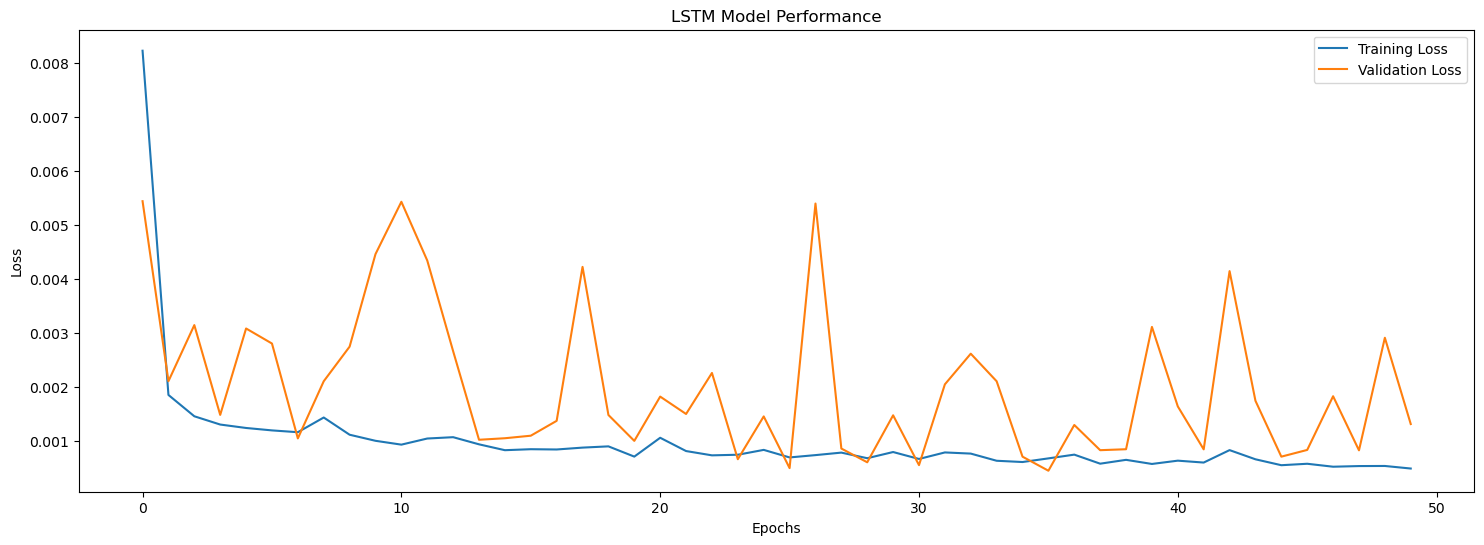

In [46]:
# Visualizing model performance during training
plt.figure(figsize=(18, 6))

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")

plt.title("LSTM Model Performance")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Load Best Model


In [47]:
# Prepare model location and name
model_location = "..//models//"
model_name = "aapl_stock_price_lstm.model.keras"

# Load the best performing model
best_model = load_model(model_location + model_name)

In [48]:
# Predict stock price for all data splits
y_train_predict = best_model.predict(X_train)
y_validate_predict = best_model.predict(X_validate)
y_test_predict = best_model.predict(X_test)

100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [49]:
# Prepare scaler model name and location
scaler_model_location = "..//models//"
scaler_model_name = "aapl_stock_price_scaler"
scaler_model_ext = "gz"

# Store the scaler model
sc = joblib.load(scaler_model_location + scaler_model_name + "." + scaler_model_ext)

In [50]:
#original

# Restore actual distribution for predicted prices
y_train_inv = sc.inverse_transform(np.concatenate((y_train.reshape(-1,1), np.ones((len(y_train.reshape(-1,1)), 5))), axis=1))[:,0]
y_validate_inv = sc.inverse_transform(np.concatenate((y_validate.reshape(-1,1), np.ones((len(y_validate.reshape(-1,1)), 5))), axis=1))[:,0]
y_test_inv = sc.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.ones((len(y_test.reshape(-1,1)), 5))), axis=1))[:,0]

y_train_predict_inv = sc.inverse_transform(np.concatenate((y_train_predict, np.ones((len(y_train_predict), 5))), axis=1))[:,0]
y_validate_predict_inv = sc.inverse_transform(np.concatenate((y_validate_predict, np.ones((len(y_validate_predict), 5))), axis=1))[:,0]
y_test_predict_inv = sc.inverse_transform(np.concatenate((y_test_predict, np.ones((len(y_test_predict), 5))), axis=1))[:,0]

ValueError: operands could not be broadcast together with shapes (3192,6) (17,) (3192,6) 

In [53]:
#chatgpt code

# Ensure each of the arrays y_train, y_validate, etc., are reshaped to (-1, 1) for compatibility.
y_train_inv = sc.inverse_transform(np.hstack((y_train.reshape(-1, 1), np.ones((len(y_train), 5)))))[:, 0]
y_validate_inv = sc.inverse_transform(np.hstack((y_validate.reshape(-1, 1), np.ones((len(y_validate), 5)))))[:, 0]
y_test_inv = sc.inverse_transform(np.hstack((y_test.reshape(-1, 1), np.ones((len(y_test), 5)))))[:, 0]

y_train_predict_inv = sc.inverse_transform(np.hstack((y_train_predict.reshape(-1, 1), np.ones((len(y_train_predict), 5)))))[:, 0]
y_validate_predict_inv = sc.inverse_transform(np.hstack((y_validate_predict.reshape(-1, 1), np.ones((len(y_validate_predict), 5)))))[:, 0]
y_test_predict_inv = sc.inverse_transform(np.hstack((y_test_predict.reshape(-1, 1), np.ones((len(y_test_predict), 5)))))[:, 0]

ValueError: operands could not be broadcast together with shapes (3192,6) (17,) (3192,6) 

In [54]:
#chatgpt code

# Ensure y arrays are reshaped to (-1, 1) before concatenation
# Concatenate with 16 columns of ones to match the original 17 columns expected by `sc`

y_train_inv = sc.inverse_transform(np.concatenate((y_train.reshape(-1, 1), np.ones((len(y_train), 16))), axis=1))[:, 0]
y_validate_inv = sc.inverse_transform(np.concatenate((y_validate.reshape(-1, 1), np.ones((len(y_validate), 16))), axis=1))[:, 0]
y_test_inv = sc.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.ones((len(y_test), 16))), axis=1))[:, 0]

y_train_predict_inv = sc.inverse_transform(np.concatenate((y_train_predict.reshape(-1, 1), np.ones((len(y_train_predict), 16))), axis=1))[:, 0]
y_validate_predict_inv = sc.inverse_transform(np.concatenate((y_validate_predict.reshape(-1, 1), np.ones((len(y_validate_predict), 16))), axis=1))[:, 0]
y_test_predict_inv = sc.inverse_transform(np.concatenate((y_test_predict.reshape(-1, 1), np.ones((len(y_test_predict), 16))), axis=1))[:, 0]



In [55]:
# Define chart colors
train_actual_color = "cornflowerblue"
validate_actual_color = "orange"
test_actual_color = "green"
train_predicted_color = "lightblue"
validate_predicted_color = "peru"
test_predicted_color = "limegreen"

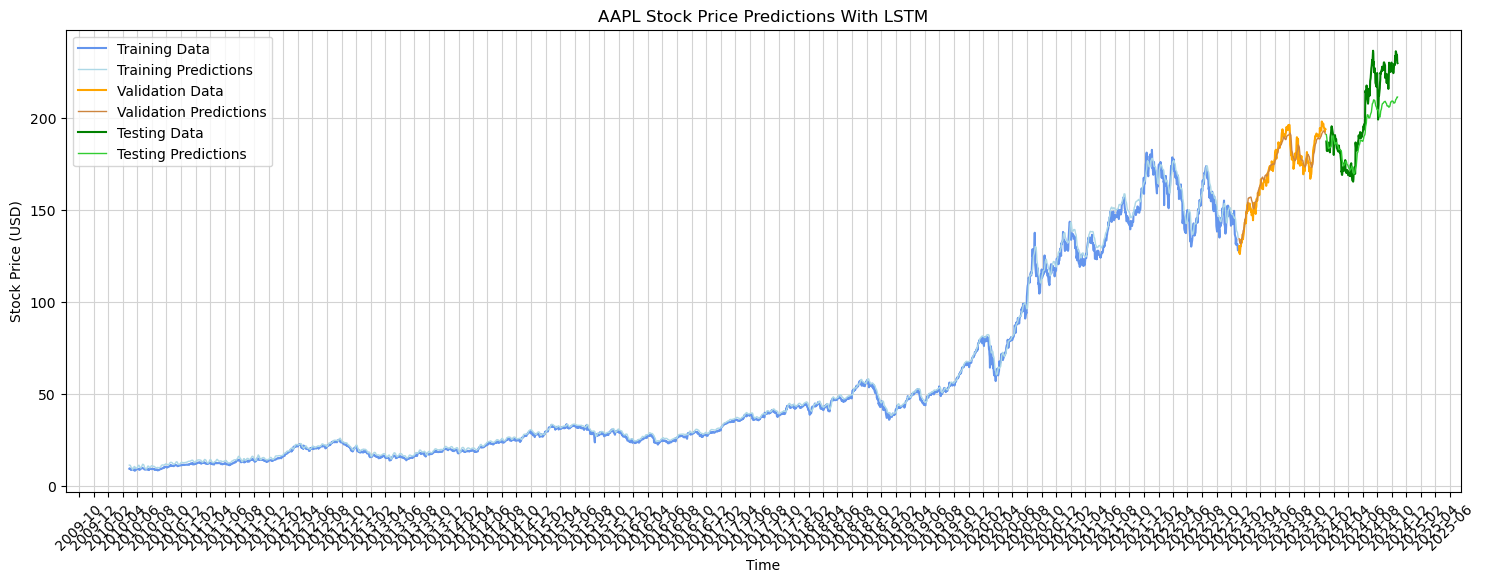

In [58]:
# Plot actual and predicted price
plt.figure(figsize=(18,6))
plt.plot(data_train_dates[sequence_size:,], y_train_inv, label="Training Data", color=train_actual_color)
plt.plot(data_train_dates[sequence_size:,], y_train_predict_inv, label="Training Predictions", linewidth=1, color=train_predicted_color)

plt.plot(data_validate_dates, y_validate_inv, label="Validation Data", color=validate_actual_color)
plt.plot(data_validate_dates, y_validate_predict_inv, label="Validation Predictions", linewidth=1, color=validate_predicted_color)

plt.plot(data_test_dates, y_test_inv, label="Testing Data", color=test_actual_color)
plt.plot(data_test_dates, y_test_predict_inv, label="Testing Predictions", linewidth=1, color=test_predicted_color)

plt.title("AAPL Stock Price Predictions With LSTM")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.legend()
plt.grid(color="lightgray")

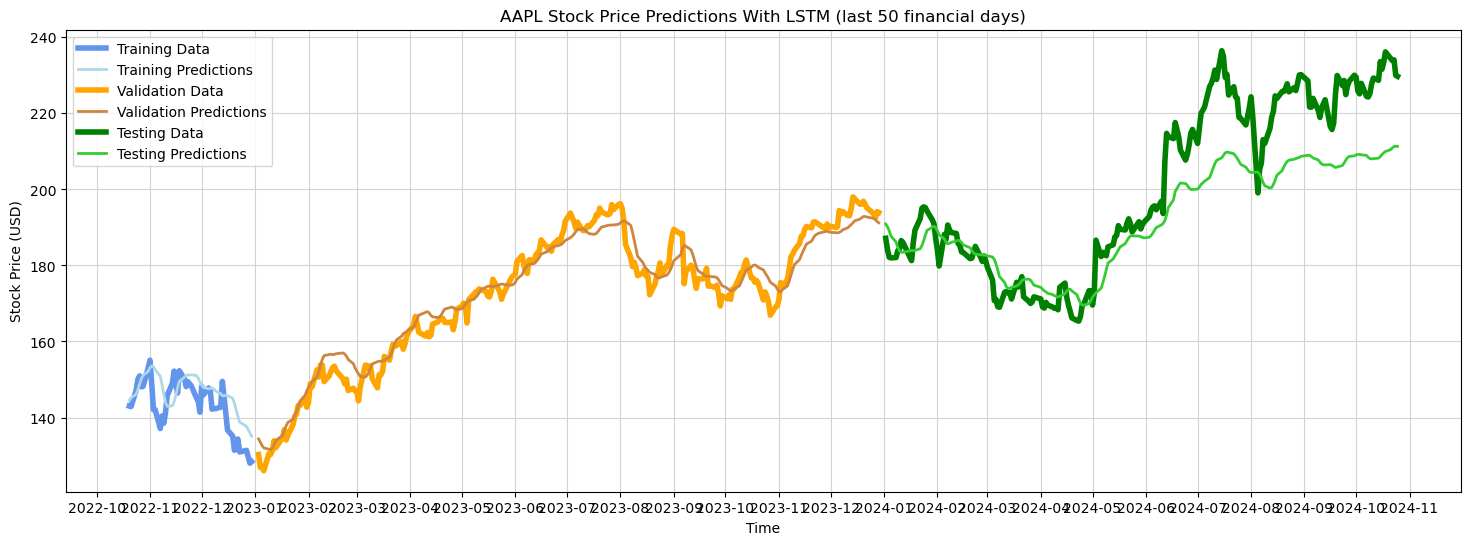

In [59]:
recent_samples = 50
plt.figure(figsize=(18,6))
plt.plot(data_train_dates[-recent_samples:,], y_train_inv[-recent_samples:,], label="Training Data", color=train_actual_color, linewidth=4)
plt.plot(data_train_dates[-recent_samples:,], y_train_predict_inv[-recent_samples:,], label="Training Predictions", linewidth=2, color=train_predicted_color)

plt.plot(data_validate_dates, y_validate_inv, label="Validation Data", color=validate_actual_color, linewidth=4)
plt.plot(data_validate_dates, y_validate_predict_inv, label="Validation Predictions", linewidth=2, color=validate_predicted_color)

plt.plot(data_test_dates, y_test_inv, label="Testing Data", color=test_actual_color, linewidth=4)
plt.plot(data_test_dates, y_test_predict_inv, label="Testing Predictions", linewidth=2, color=test_predicted_color)

plt.title("AAPL Stock Price Predictions With LSTM (last 50 financial days)")
plt.xlabel("Time")
plt.ylabel("Stock Price (USD)")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
# plt.xticks(rotation=45)
plt.legend()
plt.grid(color="lightgray")

adapted from https://github.com/sinanw/lstm-stock-price-prediction/tree/main